### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Loading data and obtaining a brief summary

In [32]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv',nrows=100000)
df.info()
df.describe()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Severity               100000 non-null  int64  
 2   Start_Time             100000 non-null  object 
 3   End_Time               100000 non-null  object 
 4   Start_Lat              100000 non-null  float64
 5   Start_Lng              100000 non-null  float64
 6   End_Lat                100000 non-null  float64
 7   End_Lng                100000 non-null  float64
 8   Distance(mi)           100000 non-null  float64
 9   Description            100000 non-null  object 
 10  Number                 20843 non-null   float64
 11  Street                 100000 non-null  object 
 12  Side                   100000 non-null  object 
 13  City                   99985 non-null   object 
 14  County                 100000 non-nul

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Dealing with missing values

In [7]:
df_non_numeric=df.drop(columns=df.select_dtypes('number').columns,axis=1)

In [8]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer=IterativeImputer(sample_posterior=True)
df_filled1=pd.DataFrame(imputer.fit_transform(df.select_dtypes('number')),columns=df.select_dtypes('number').columns)

imputer = SimpleImputer(strategy='most_frequent')
df_non_numeric_filled = pd.DataFrame(imputer.fit_transform(df_non_numeric), columns=df_non_numeric.columns)

In [9]:
new_df=pd.concat([df_non_numeric_filled,df_filled1],axis=1)
new_df['Number']=round(new_df['Number'])

### Visualization

#### Disabling warnings

In [13]:
import warnings
warnings.filterwarnings('ignore')

### States with highest total number of accident victims

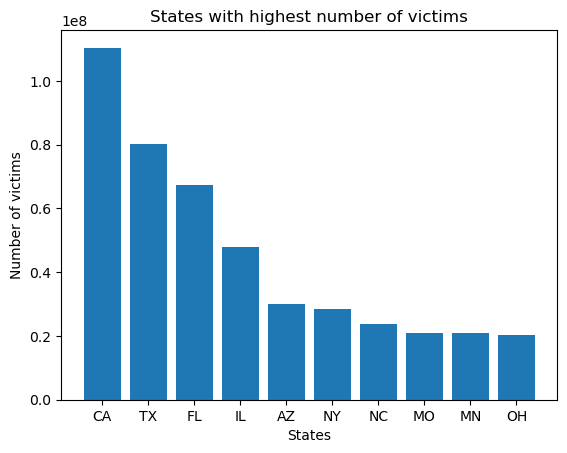

In [14]:
number_sum=new_df.groupby('State',axis=0).sum().sort_values(['Number'],ascending=False)[:10].Number
states=new_df.groupby('State').sum().sort_values('Number',ascending=False)[:10].T.columns

number_sum=new_df.groupby('State',axis=0).sum().sort_values(['Number'],ascending=False)[:10].Number
states=new_df.groupby('State').sum().sort_values('Number',ascending=False)[:10].T.columns
plt.bar(states,number_sum)
plt.title('States with highest number of victims')
plt.xlabel('States')
plt.ylabel('Number of victims')
plt.show()

### States with highest number of accidents victims per capita

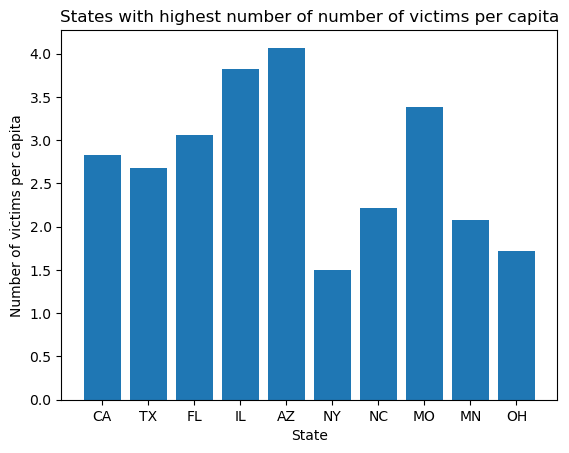

In [15]:
state_pop={
    'CA':39000000,
    'TX':30000000,
    'FL':22000000,
    'NY':19000000,
    'IL':12500000,
    'OH':11750000,
    'NC':10690000,
    'MN':10000000,
    'AZ':7350000,
    'MO':6177000,
}
def per_capita(x):
    accidents_per_capita=[]
    for i in range(len(x.index)):
        pop=state_pop.get(x.index[i])
        accidents_per_capita.append(x[i]/pop)
    states=[state for state in x.index]
    return states,accidents_per_capita

x,y=per_capita(number_sum)
plt.bar(x,y)
plt.xlabel('State')
plt.ylabel('Number of victims per capita')
plt.title('States with highest number of number of victims per capita')
plt.show()

In [14]:
new_df.groupby('City').sum().sort_values('Number',ascending=False)[:10]


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
City,,,,,,,,,,,,,,
Houston,8005.0,97903.327863,-312971.375378,97904.762124,-312969.848966,1721.993,26218926.0,246915.282058,249955.159784,229306.073335,98593.562904,29960.803463,27741.408792,221.055957
Dallas,7349.0,98132.052148,-289406.757449,98132.235980,-289407.355509,1308.190,23448335.0,212763.729958,212306.544031,193091.538530,89807.773828,29106.910225,27340.532497,158.951574
Charlotte,6169.0,106216.280818,-243667.338850,106216.714688,-243667.071798,382.783,15511505.0,200399.214636,199965.690826,199062.263785,90705.370000,27763.607747,23022.299548,315.471303
Miami,4472.0,49021.772289,-152454.571220,49021.363040,-152454.768588,752.488,12099351.0,152213.882627,155054.402450,134668.822884,57014.582006,18532.452439,18234.645200,151.375845
Los Angeles,2337.0,36657.606964,-127390.660085,36657.363145,-127390.393914,341.586,10541711.0,70899.837741,70075.842220,67008.511125,32259.760000,10147.900000,8187.016937,9.580192
Chicago,4893.0,81698.167586,-171138.536257,81698.748898,-171138.159259,633.446,9991985.0,108723.300000,102119.227028,133695.000000,58651.590000,17617.900000,19540.275493,140.140269
Phoenix,2365.0,33742.691193,-112646.279193,33741.770595,-112645.860619,602.382,8242083.0,77927.400000,79203.224921,37375.000000,30086.750000,10567.729653,7844.295751,71.024984
Kansas City,2612.0,44826.418939,-108471.926450,44826.057071,-108471.444176,469.892,7925938.0,68779.280590,66309.901227,75534.727470,34438.065287,10909.095770,10448.812179,78.635847
Minneapolis,2381.0,51434.582263,-106742.811440,51434.773158,-106743.159231,734.817,7316260.0,55411.700000,49675.863104,79710.000000,34315.780000,10358.100000,11857.352561,70.313305


<Axes: >

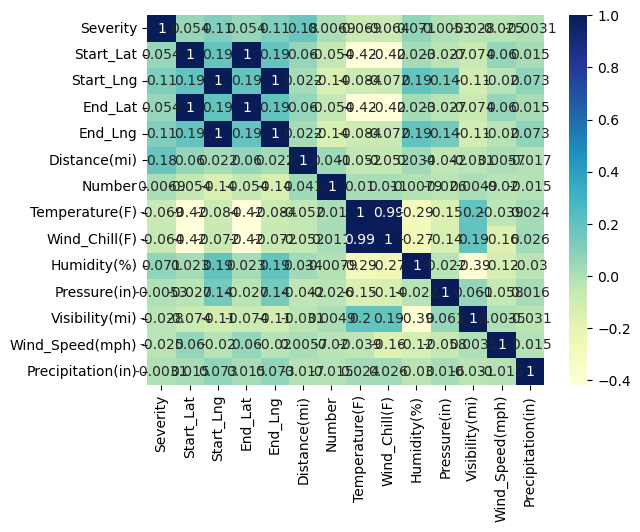

In [23]:
sns.heatmap(new_df.select_dtypes('number').corr(),cbar=True,annot=True,cmap='YlGnBu')

In [55]:
new_df.select_dtypes('number')

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3.0,40.108910,-83.092860,40.112060,-83.031870,3.230,9554.0,42.1,36.100000,58.0,29.76,10.0,10.400000,0.000000
1,2.0,39.865420,-84.062800,39.865010,-84.048730,0.747,11127.0,36.9,30.025226,91.0,29.68,10.0,9.418114,0.020000
2,2.0,39.102660,-84.524680,39.102090,-84.523960,0.055,1868.0,36.0,30.007112,97.0,29.70,10.0,2.785695,0.020000
3,2.0,41.062130,-81.537840,41.062170,-81.535470,0.123,8514.0,39.0,36.496322,55.0,29.65,10.0,5.495828,-0.918940
4,3.0,39.172393,-84.492792,39.170476,-84.501798,0.500,705.0,37.0,29.800000,93.0,29.69,10.0,10.400000,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.0,39.958020,-75.163290,39.958420,-75.166470,0.171,23869.0,75.0,77.306781,23.0,30.21,10.0,4.600000,0.045040
99996,2.0,40.700200,-73.985110,40.698410,-73.983150,0.161,10292.0,73.4,76.917533,31.0,30.21,10.0,5.800000,1.325556
99997,2.0,39.872430,-75.102280,39.871020,-75.102120,0.098,14759.0,75.0,78.686490,23.0,30.21,10.0,4.600000,-0.074901
99998,3.0,40.778840,-73.826470,40.784510,-73.824330,0.407,31013.0,75.0,74.512990,28.0,30.19,10.0,10.400000,0.141006


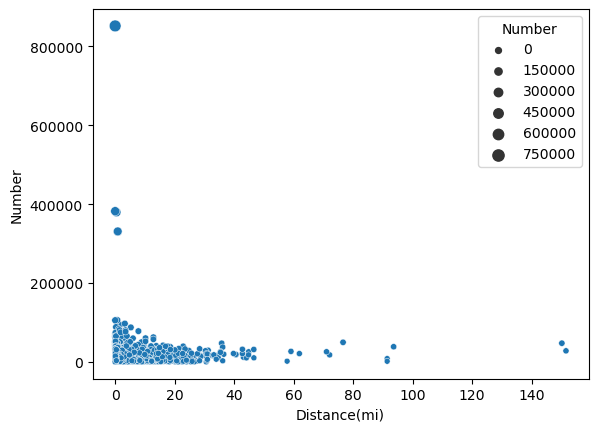

In [59]:
sns.scatterplot(x='Distance(mi)',y='Number',data=new_df,size = 'Number')
plt.show()

In [52]:
def positivezer(x):
    if x<0:
        return x*-1
    else:
        return x

In [54]:
new_df.Number=new_df.Number.apply(lambda x: positivezer(x))